In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
import cv2

In [2]:
#img_path = '../../data/commaai/train_bags_2/0/28_911run1.png'
img_path = '../../data/commaai/train_bags_2/0/2_1079run1.png'
image = imageio.imread(img_path)

In [3]:
ang_file = pd.read_csv('../../data/commaai/train_bags_2/1/angles_filename.csv', header = None)
ang_file.columns = ['file', 'angle', 'tr_angle']

In [4]:
label = ang_file.loc[ang_file['file'] == img_path, 'angle']

In [5]:
label = 0

In [6]:
a_rad = label / 180. * np.pi + np.pi / 2

In [20]:
ang_dens = pd.DataFrame({'angle': np.linspace(-20,20,5000), 'density': np.append(np.linspace(0,0.1,2500), np.linspace(0.1,0,2500))  })

In [8]:
ang_dens

,angle,density
0,-70.000000,0.00000
1,-69.967994,0.00002
2,-69.935987,0.00004
3,-69.903981,0.00006
4,-69.871974,0.00008
...,...,...
4995,89.871974,0.09992
4996,89.903981,0.09994
4997,89.935987,0.09996
4998,89.967994,0.09998


In [21]:
def plot_density(ang_dens, c, r):
    ang_dens['angle_rad'] = ang_dens['angle'].apply(lambda x: x / 180. * np.pi + np.pi / 2)
    ang_dens['t'] = ang_dens['angle_rad'].apply(lambda x: (c[0] + np.cos(x) * r, c[1] - np.sin(x) * r))
    for i in range(0, ang_dens['t'].shape[0]):
        t = ang_dens['t'][i]
        dens = ang_dens['density'][i]
        plt.plot((c[0], t[0]), (c[1], t[1]), 'dodgerblue', alpha = dens)
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

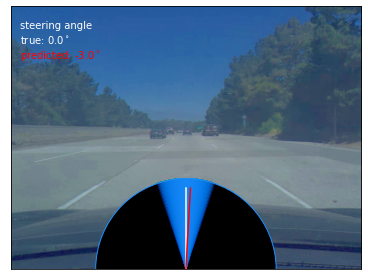

In [22]:
pred = -3
figure, ax = plt.figure(), plt.gca()
#circle1 = plt.Circle((0.2, 0.5), 0.5, color='r')
#ax.add_patch(circle1)
#plt.imshow(img)
ax.imshow(change_brightness(image, value = 70))
a_rad = label / 180. * np.pi + np.pi / 2
c, r = (582,873), 300 #center, radius
plot_density(ang_dens, c, r)
t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))
plt.plot((c[0], t[0]), (c[1], t[1] + 30), 'w', alpha = 1)
a_rad = pred / 180. * np.pi + np.pi / 2
c, r = (582,873), 300 #center, radius
t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))
plt.plot((c[0], t[0]), (c[1] , t[1] + 30), 'r', alpha = 1)
plt.gca().add_artist(plt.Circle(c, r, edgecolor='dodgerblue', facecolor='k'))
plt.text(c[0] - 550 , c[1] - 800, 'steering angle'.format(label), color='w')
plt.text(c[0] - 550 , c[1] - 750, 'true: {:0.1f}$^\circ$'.format(label), color='w')
plt.text(c[0] - 550 , c[1] - 700, 'predicted: {:0.1f}$^\circ$'.format(pred), color='r')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
figure.savefig('example_steering_visualization.pdf', format='pdf', dpi=900)

In [ ]:
ang_dens